In [ ]:
!pip install opencv-python

In [152]:
import cv2
import numpy as np

In [153]:
image_data = cv2.imread('/content/drive/MyDrive/computer_vision_material/sports.jpg')

In [154]:
print(image_data.shape)

(480, 640, 3)


In [155]:
from google.colab.patches import cv2_imshow

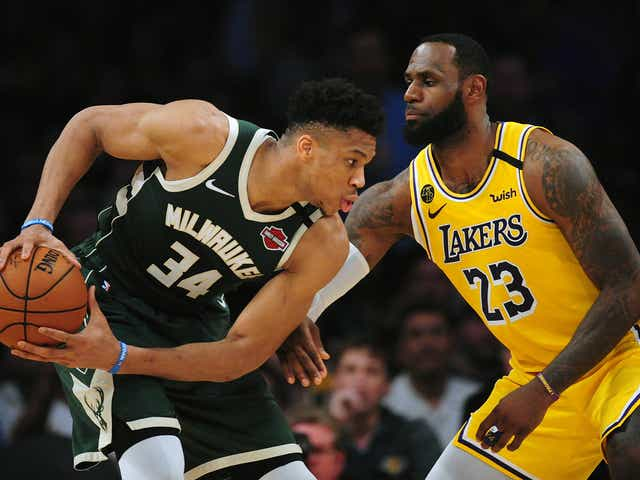

In [156]:
cv2_imshow(image_data)
cv2.destroyAllWindows()

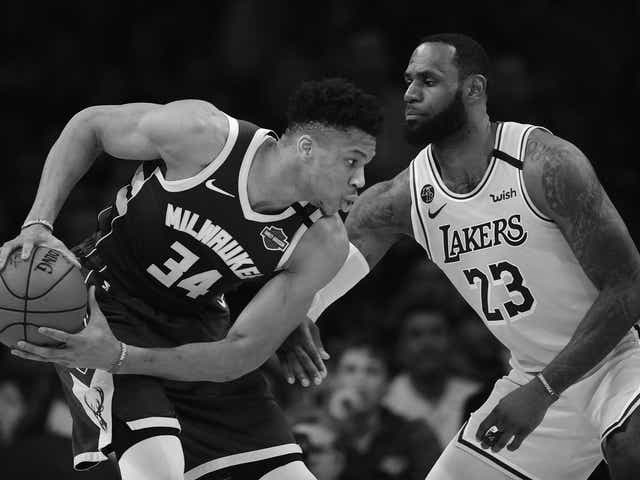

In [157]:
grayscale_image = cv2.cvtColor(image_data,cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale_image)
cv2.destroyAllWindows()

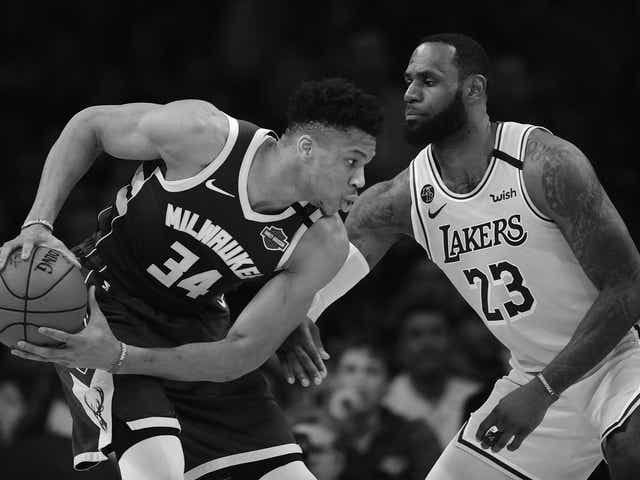

In [158]:
# image_data_Gray = cv2.imread('/content/drive/MyDrive/computer_vision_material/sports.jpg', 0)
image_data_Gray = cv2.imread('/content/drive/MyDrive/computer_vision_material/sports.jpg', cv2.IMREAD_GRAYSCALE)
# image_data_Gray = cv2.imread('/content/drive/MyDrive/computer_vision_material/sports.jpg', 1)
cv2_imshow(image_data_Gray)
cv2.destroyAllWindows()

In [23]:
cv2.imwrite('/content/drive/MyDrive/computer_vision_material/sports_out_img.jpg', image_data_Gray)

True

In [2]:
import os

In [5]:
os.getcwd()

'/content/drive/MyDrive/computer_vision_material'

In [4]:
os.chdir('/content/drive/MyDrive/computer_vision_material')

In [45]:
import cv2 as cv
import numpy as np

In [137]:
img = cv.imread('/content/drive/MyDrive/computer_vision_material/Sample_1.jpg')

In [138]:
from google.colab.patches import cv2_imshow

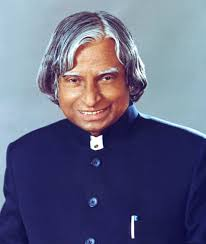

In [139]:
cv2_imshow(img)

In [140]:
gray = cv.imread('/content/drive/MyDrive/computer_vision_material/Sample_1.jpg', cv.IMREAD_GRAYSCALE)

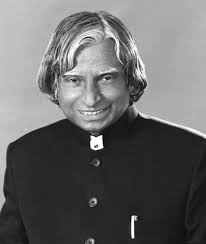

In [141]:
cv2_imshow(gray)

In [142]:
haar_cascade = cv.CascadeClassifier('/content/drive/MyDrive/computer_vision_material/haarcascade_frontalface_default.xml')

In [143]:
faces_rect = haar_cascade.detectMultiScale(img, scaleFactor = 1.1, minNeighbors = 3)

In [144]:
print('No of face found {}'.format(len(faces_rect)))

No of face found 1


In [145]:
for (x,y,w,h) in faces_rect:
  cv.rectangle(img, (x,y), (x+w, y+h), (0,255,0), thickness=2)

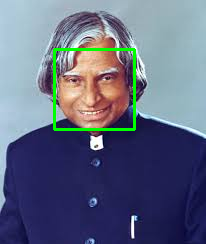

In [146]:
cv2_imshow(img)

In [147]:
haar_cascade_eye = cv.CascadeClassifier('/content/drive/MyDrive/computer_vision_material/haarcascade_eye.xml')

In [148]:
for (x,y,w,h) in faces_rect:
  cv.rectangle(img, (x,y), (x+w, y+h), (0,255,0), thickness=2)
  roi_color = img[y:y+h, x:x+w]
  eyes = haar_cascade_eye.detectMultiScale(roi_color)
  for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

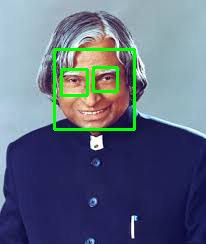

In [149]:
cv2_imshow(img)

In [25]:
os.listdir('./data/train')

['Pratibha Patil', 'Atal Bihari Vajpayee', 'APJ Abdul Kalam']

In [26]:
people = []
for i in os.listdir('./data/train'):
  people.append(i)


In [27]:
people

['Pratibha Patil', 'Atal Bihari Vajpayee', 'APJ Abdul Kalam']

In [31]:
DIR = '/content/drive/MyDrive/computer_vision_material/data/train'

haar_cascade = cv.CascadeClassifier('/content/drive/MyDrive/computer_vision_material/haarcascade_frontalface_default.xml')

features = []
labels = []

def create_train():
    for person in people:
        path = os.path.join(DIR, person)
        label = people.index(person)

        for img in os.listdir(path):
            img_path = os.path.join(path,img)

            img_array = cv.imread(img_path)
            if img_array is None:
                continue 
                
            gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)

            faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

            for (x,y,w,h) in faces_rect:
                faces_roi = gray[y:y+h, x:x+w]
                features.append(faces_roi)
                labels.append(label)

create_train()
print('Training done ---------------')

features = np.array(features, dtype='object')
labels = np.array(labels)

face_recognizer = cv.face.LBPHFaceRecognizer_create()

# Train the Recognizer on the features list and the labels list
face_recognizer.train(features,labels)

face_recognizer.save('face_trained.yml')
np.save('features.npy', features)
np.save('labels.npy', labels)

Training done ---------------


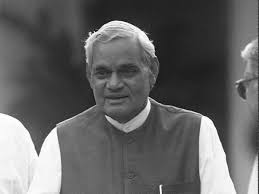

Label = Atal Bihari Vajpayee with a confidence of 0.0


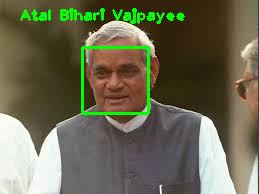

In [151]:
face_recognizer.read('face_trained.yml')

img = cv.imread('/content/drive/MyDrive/computer_vision_material/data/test/Atal Bihari Vajpayee/images (9).jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

# Detect the face in the image
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces_rect:
    faces_roi = gray[y:y+h,x:x+w]

    label, confidence = face_recognizer.predict(faces_roi)
    print(f'Label = {people[label]} with a confidence of {confidence}')

    cv.putText(img, str(people[label]), (20,20), cv.FONT_HERSHEY_PLAIN, 1.0, (0,255,0), thickness=2)
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

cv2_imshow(img)

In [ ]:
# !pip install --upgrade caer canaro

import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
import sklearn.model_selection as skm


IMG_SIZE = (80,80)
channels = 1
char_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset'

# Creating a character dictionary, sorting it in descending order
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

# Sort in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

#  Getting the first 10 categories with the most number of images
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
characters

# Create the training data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

# Number of training samples
len(train)

# Visualizing the data (OpenCV doesn't display well in Jupyter notebooks)
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

# Separating the array and corresponding labels
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)


# Normalize the featureSet ==> (0,1)
featureSet = caer.normalize(featureSet)
# Converting numerical labels to binary class vectors
labels = to_categorical(labels, len(characters))


# Creating train and validation data

## NOTE:
## In the tutorial, I've use the following line
### x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=.2)
## However, due to recent API changes in `caer`, this is now a deprecated feature. 
## Instead, you can use the following line (which use's SkLearn's train-test split feature). 
## Both achieve the same end result 

# Do note that `val_ratio` is now `test_size`. 
split_data = skm.train_test_split(featureSet, labels, test_size=.2)
x_train, x_val, y_train, y_val = (np.array(item) for item in split_data)


# Deleting variables to save memory
del train
del featureSet
del labels 
gc.collect()

# Useful variables when training
BATCH_SIZE = 32
EPOCHS = 10

# Image data generator (introduces randomness in network ==> better accuracy)
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Create our model (returns the compiled model)
model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim=len(characters), 
                                         loss='binary_crossentropy', decay=1e-7, learning_rate=0.001, momentum=0.9,
                                         nesterov=True)

model.summary()

# Training the model

callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]
training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

print(characters)


"""## Testing"""

test_path = r'../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_0.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()

def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image

predictions = model.predict(prepare(img))

# Getting class with the highest probability
print(characters[np.argmax(predictions[0])])